# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   SAYA MENEMUKAN DATASET PADA KAGGLE :https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data

   Namun saya ambil bagian merk mobil toyota.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from google.colab import files
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

# Baca CSV
df = pd.read_csv(filename)

Saving toyota.csv to toyota.csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
print("\n=== Bentuk Dataset ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


=== Bentuk Dataset ===
Jumlah baris: 6738
Jumlah kolom: 9


In [5]:
# Informasi dataset
print("\n=== Informasi Dataset ===")
df.info()


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
# Nama-nama kolom
print("\n=== Nama Kolom ===")
print(df.columns.tolist())


=== Nama Kolom ===
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


In [7]:
# Statistik untuk kolom numerik
print("\n=== Statistik Deskriptif ===")
df.describe()


=== Statistik Deskriptif ===


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [8]:
# Statistik untuk kolom kategorikal
print("\n=== Statistik Kategorikal ===")
df.describe(include='object')


=== Statistik Kategorikal ===


,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


In [9]:
# Cek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [10]:
# Persentase missing values
print("\n=== Persentase Missing Values ===")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)


=== Persentase Missing Values ===
model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64


In [11]:
# Cek duplikasi
print("\n=== Duplikasi ===")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")


=== Duplikasi ===
Jumlah baris duplikat: 39


In [12]:
# Lihat data yang duplikat (kalau ada)
if df.duplicated().sum() > 0:
    print("\n=== Data yang Duplikat ===")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))


=== Data yang Duplikat ===
       model  year  price transmission  mileage fuelType  tax   mpg  \
3229   Auris  2013   6622       Manual    41959   Petrol  145  47.9   
3230   Auris  2013   6622       Manual    41959   Petrol  145  47.9   
3175   Auris  2016   8992       Manual    40323   Diesel   20  67.3   
3177   Auris  2016   8992       Manual    40323   Diesel   20  67.3   
2944   Auris  2016   9985       Manual    27600   Petrol   30  58.9   
...      ...   ...    ...          ...      ...      ...  ...   ...   
1964   Yaris  2019  12495    Automatic     6000   Petrol  145  47.9   
2160   Yaris  2019  14495       Manual      100   Petrol  145  47.9   
2161   Yaris  2019  14495       Manual      100   Petrol  145  47.9   
1586   Yaris  2020  14769       Manual       25   Petrol  150  47.9   
1587   Yaris  2020  14769       Manual       25   Petrol  150  47.9   

      engineSize  
3229         1.6  
3230         1.6  
3175         1.6  
3177         1.6  
2944         1.2  
...  

In [13]:
# Lihat kolom kategorikal
print("\n=== Kolom Kategorikal ===")
print(df.select_dtypes(include='object').columns.tolist())


=== Kolom Kategorikal ===
['model', 'transmission', 'fuelType']


In [14]:
# Unique values per kolom kategorikal
print("\n=== Unique Values ===")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


=== Unique Values ===

model:
model
Yaris            2122
Aygo             1961
Auris             712
C-HR              479
RAV4              473
Corolla           267
Prius             232
Avensis           115
Verso             114
Hilux              86
GT86               73
Land Cruiser       51
PROACE VERSO       15
Supra              12
Camry              11
IQ                  8
Urban Cruiser       4
Verso-S             3
Name: count, dtype: int64

transmission:
transmission
Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: count, dtype: int64

fuelType:
fuelType
Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: count, dtype: int64


In [15]:
# Lihat kolom numerik
print("\n=== Kolom Numerik ===")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())


=== Kolom Numerik ===
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


In [16]:
# Distribusi setiap kolom numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\n=== {col} ===")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median()}")


=== year ===
Min: 1998
Max: 2020
Mean: 2016.75
Median: 2017.0

=== price ===
Min: 850
Max: 59995
Mean: 12522.39
Median: 10795.0

=== mileage ===
Min: 2
Max: 174419
Mean: 22857.41
Median: 18513.0

=== tax ===
Min: 0
Max: 565
Mean: 94.70
Median: 135.0

=== mpg ===
Min: 2.8
Max: 235.0
Mean: 63.04
Median: 62.8

=== engineSize ===
Min: 0.0
Max: 4.5
Mean: 1.47
Median: 1.5


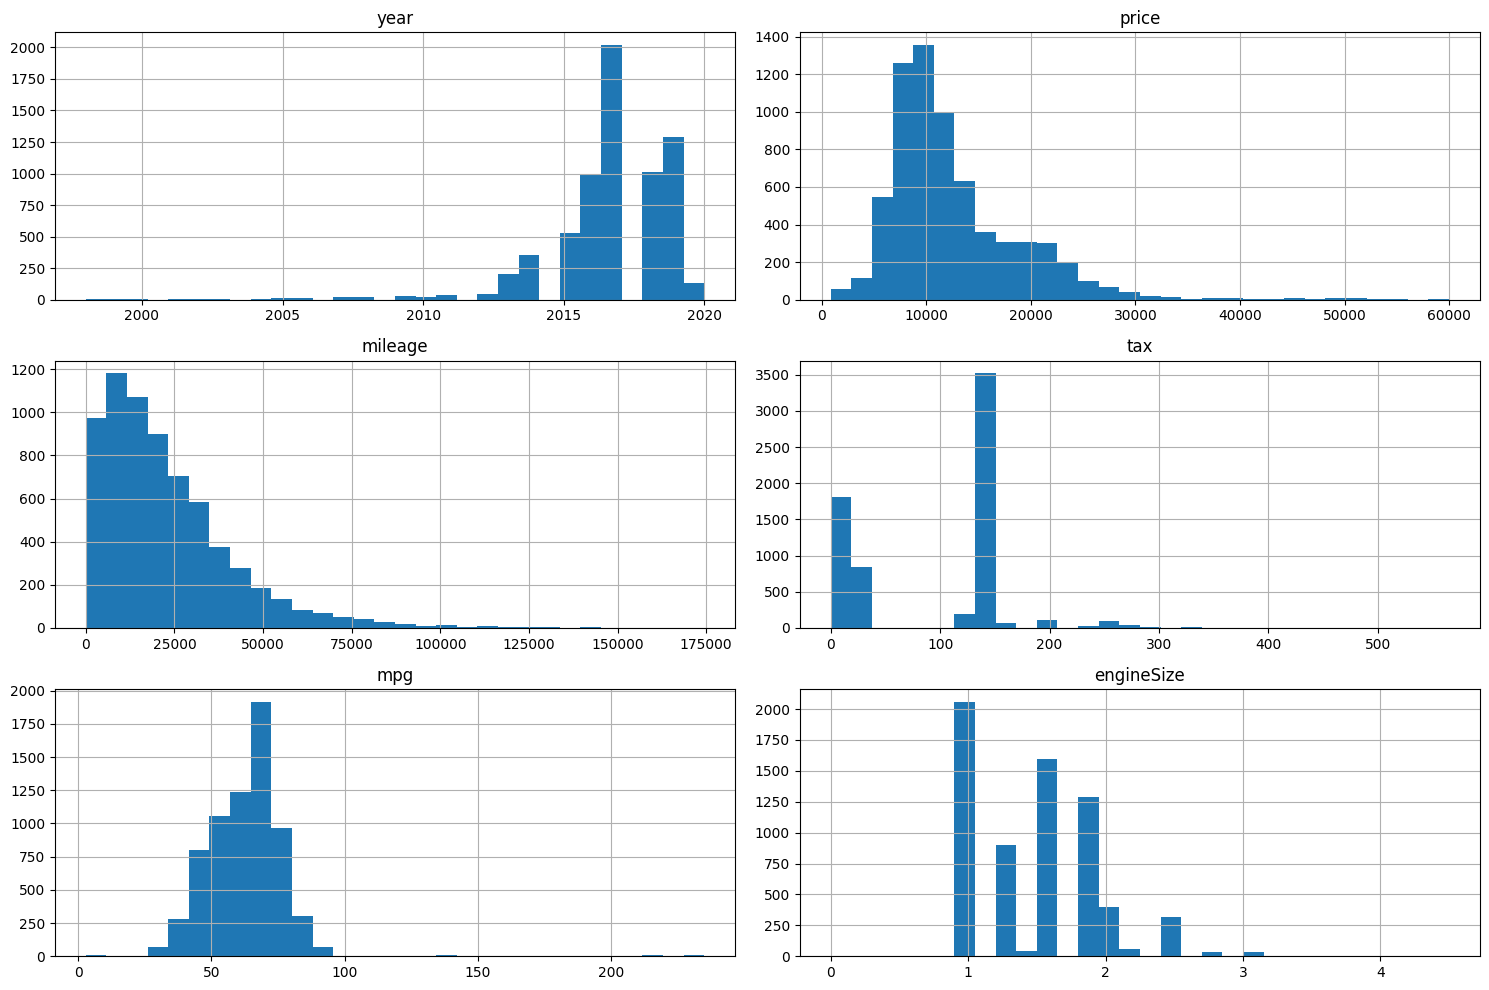

In [17]:
# Histogram untuk kolom numerik
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

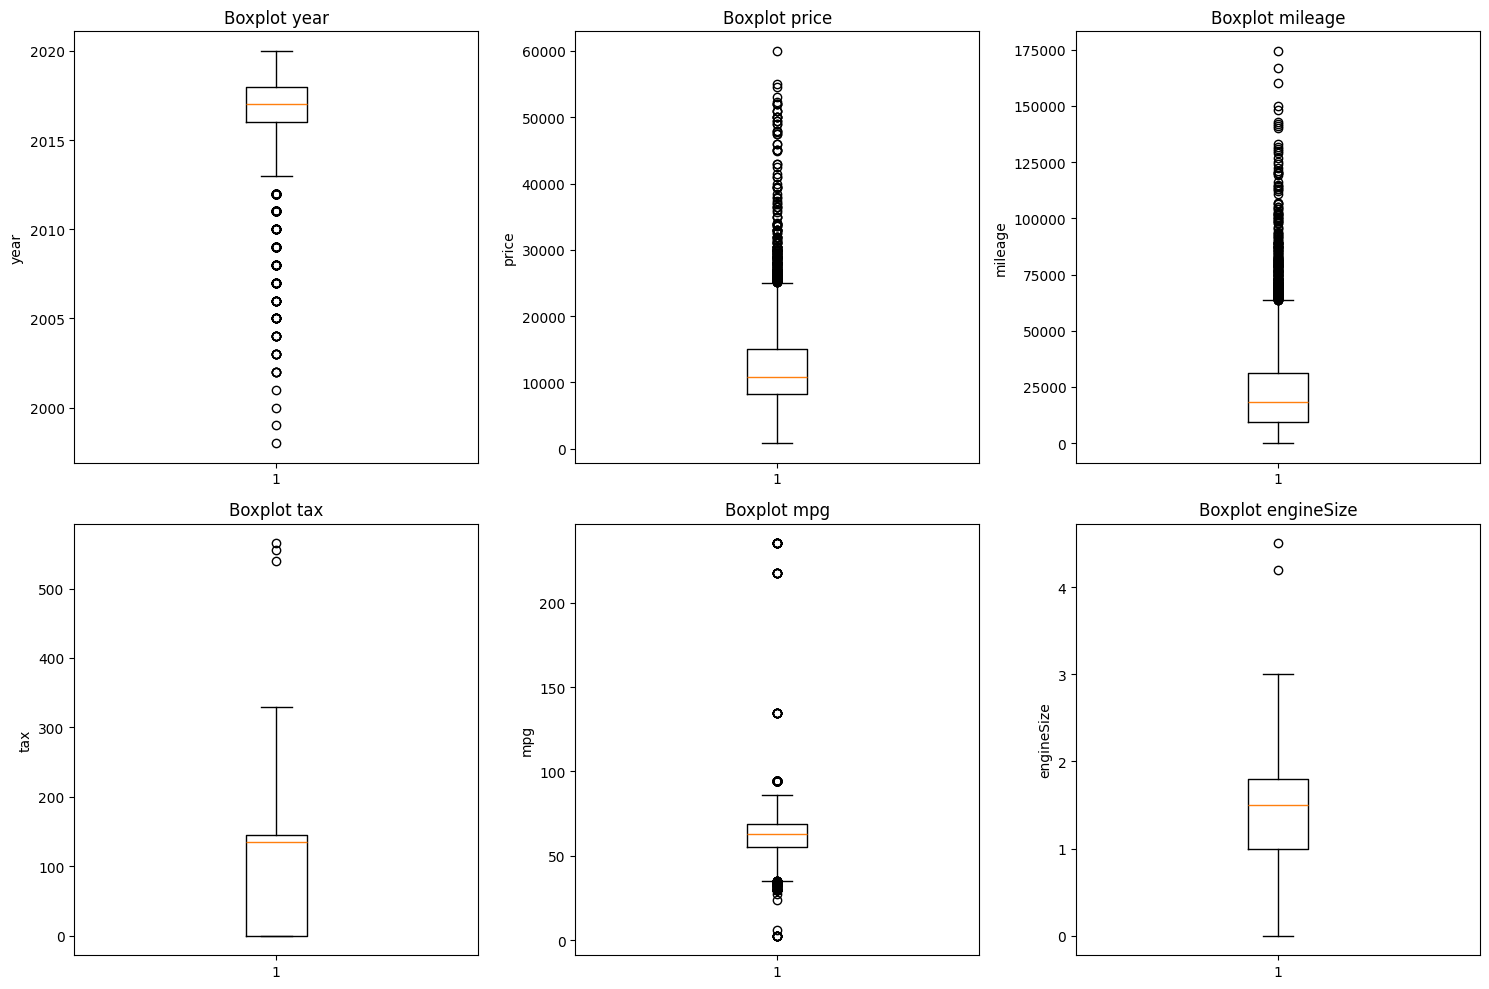

In [18]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [19]:
# Cek apakah ada nilai negatif
print("\n=== Cek Nilai Negatif ===")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    negative = (df[col] < 0).sum()
    if negative > 0:
        print(f"{col}: Ada {negative} nilai negatif")
    else:
        print(f"{col}: Tidak ada nilai negatif")


=== Cek Nilai Negatif ===
year: Tidak ada nilai negatif
price: Tidak ada nilai negatif
mileage: Tidak ada nilai negatif
tax: Tidak ada nilai negatif
mpg: Tidak ada nilai negatif
engineSize: Tidak ada nilai negatif


In [20]:
# Cek nilai 0
print("\n=== Cek Nilai 0 ===")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    zeros = (df[col] == 0).sum()
    if zeros > 0:
        print(f"{col}: Ada {zeros} nilai 0 ({zeros/len(df)*100:.2f}%)")


=== Cek Nilai 0 ===
tax: Ada 1790 nilai 0 (26.57%)
engineSize: Ada 6 nilai 0 (0.09%)


In [21]:
# Analisis engineSize = 0 lebih detail
print("\n=== Analisis EngineSize = 0 ===")
zero_engine = df[df['engineSize'] == 0]
print(f"Total: {len(zero_engine)} mobil ({len(zero_engine)/len(df)*100:.2f}%)\n")

# Lihat model dan fuel type
print("Model dan Fuel Type untuk engineSize = 0:")
print(zero_engine[['model', 'year', 'fuelType', 'engineSize', 'mpg']].head(10))


=== Analisis EngineSize = 0 ===
Total: 6 mobil (0.09%)

Model dan Fuel Type untuk engineSize = 0:
       model  year fuelType  engineSize   mpg
2535   Yaris  2016   Hybrid         0.0  86.0
2545   Yaris  2016   Hybrid         0.0  86.0
5126    Aygo  2019   Petrol         0.0  56.5
5233    Aygo  2019   Petrol         0.0  56.5
5257    Aygo  2019   Petrol         0.0  56.5
5960    C-HR  2017   Petrol         0.0  47.1


In [22]:
# Lihat contoh data dengan nilai 0 (pilih satu kolom)
# Misalnya untuk kolom 'tax'
print("\n=== Contoh Data dengan tax = 0 ===")
print(df[df['tax'] == 0].head(10))


=== Contoh Data dengan tax = 0 ===
      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
815   Yaris  2016  11500    Automatic    31911   Hybrid    0  78.0         1.5
816   Yaris  2014   8500    Automatic    72053   Hybrid    0  76.3         1.5
820   Yaris  2016  12500    Automatic    23150   Hybrid    0  78.0         1.5
829   Yaris  2016  12695    Automatic    15945   Hybrid    0  78.0         1.5
830   Yaris  2014  10495    Automatic    29452   Hybrid    0  78.0         1.5
848   Yaris  2015   9998    Automatic    49026   Hybrid    0  78.0         1.5
853   Yaris  2016  10572    Automatic    35588   Hybrid    0  86.0         1.5
857   Yaris  2016   7995       Manual    24790   Petrol    0  66.0         1.0
859   Yaris  2015  10895    Automatic    34012   Hybrid    0  78.0         1.5
863   Yaris  2015  10498    Automatic    29311   Hybrid    0  78.0         1.5


In [23]:
# Correlation matrix - HANYA untuk kolom numerik
print("\n=== Correlation Matrix ===")

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation = numerical_df.corr()
print(correlation)


=== Correlation Matrix ===
                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.420959 -0.727749  0.283455 -0.020607   -0.045567
price       0.420959  1.000000 -0.297936  0.214498 -0.039910    0.727592
mileage    -0.727749 -0.297936  1.000000 -0.205285  0.044889    0.182615
tax         0.283455  0.214498 -0.205285  1.000000 -0.430292    0.155727
mpg        -0.020607 -0.039910  0.044889 -0.430292  1.000000   -0.106868
engineSize -0.045567  0.727592  0.182615  0.155727 -0.106868    1.000000


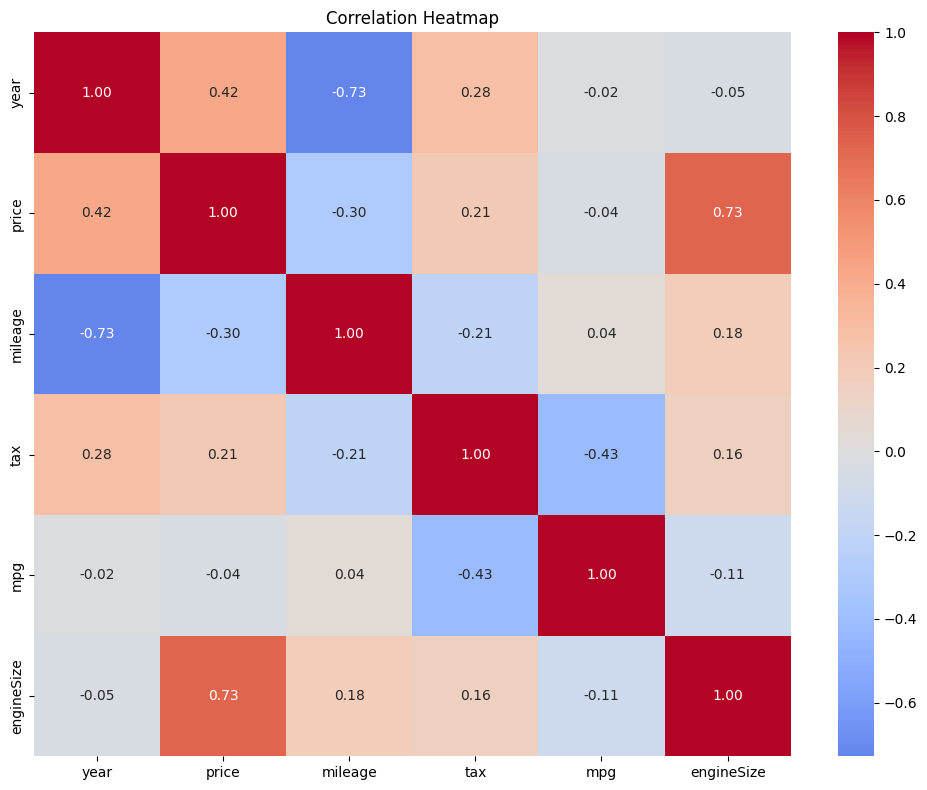

In [24]:
# Heatmap korelasi - HANYA untuk kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

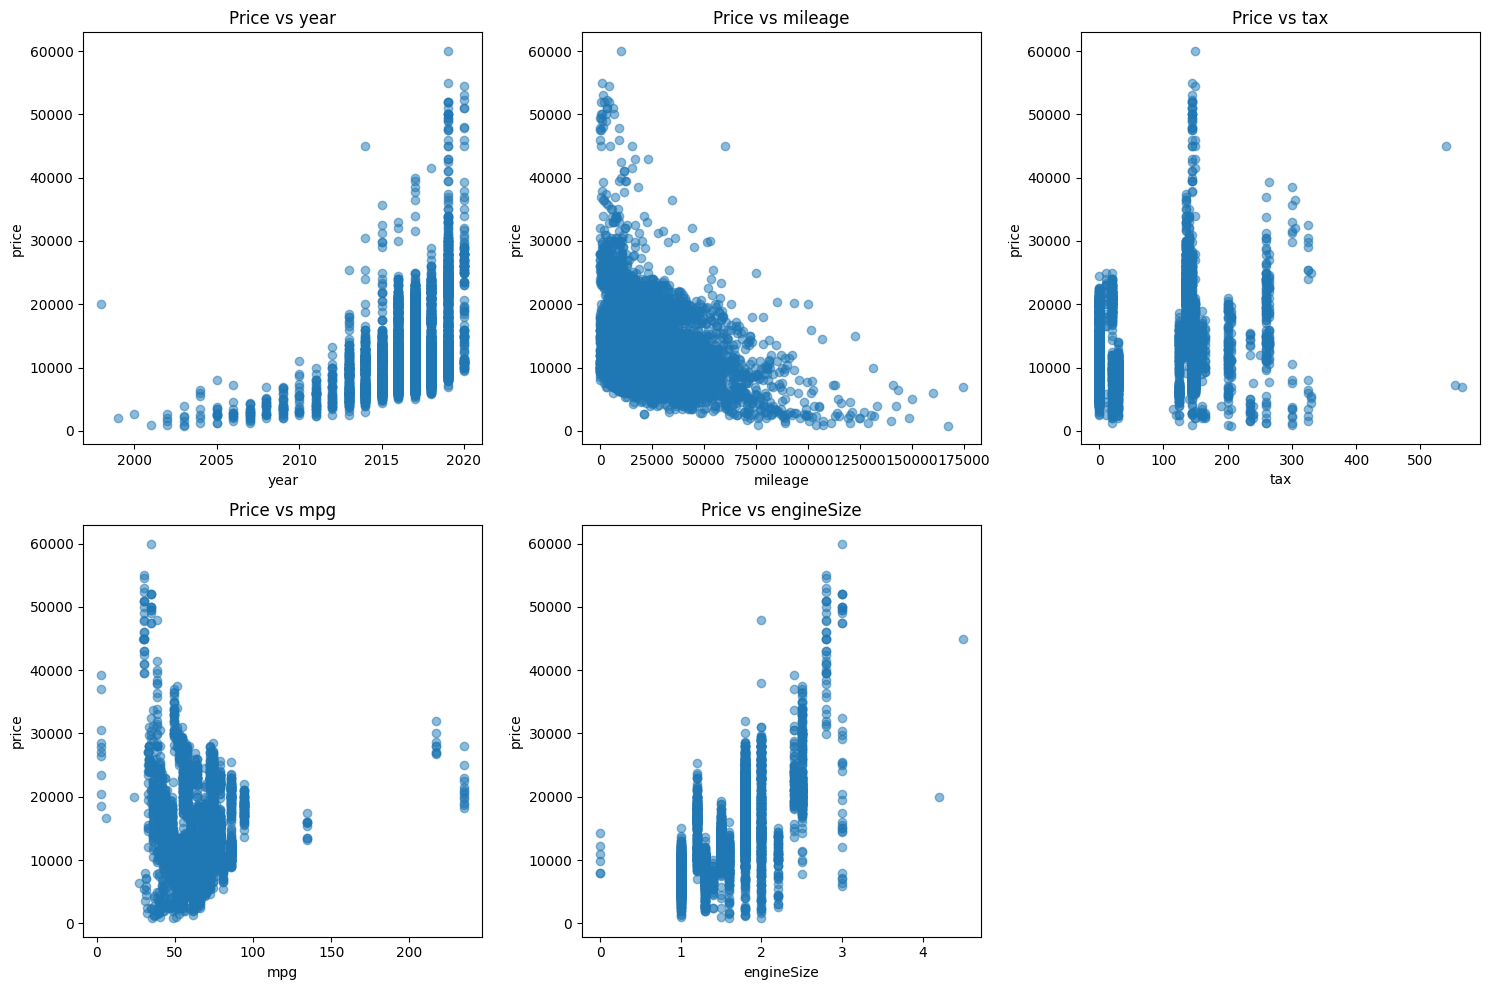

In [25]:
# Scatter plot: price vs kolom lain
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[col], df['price'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

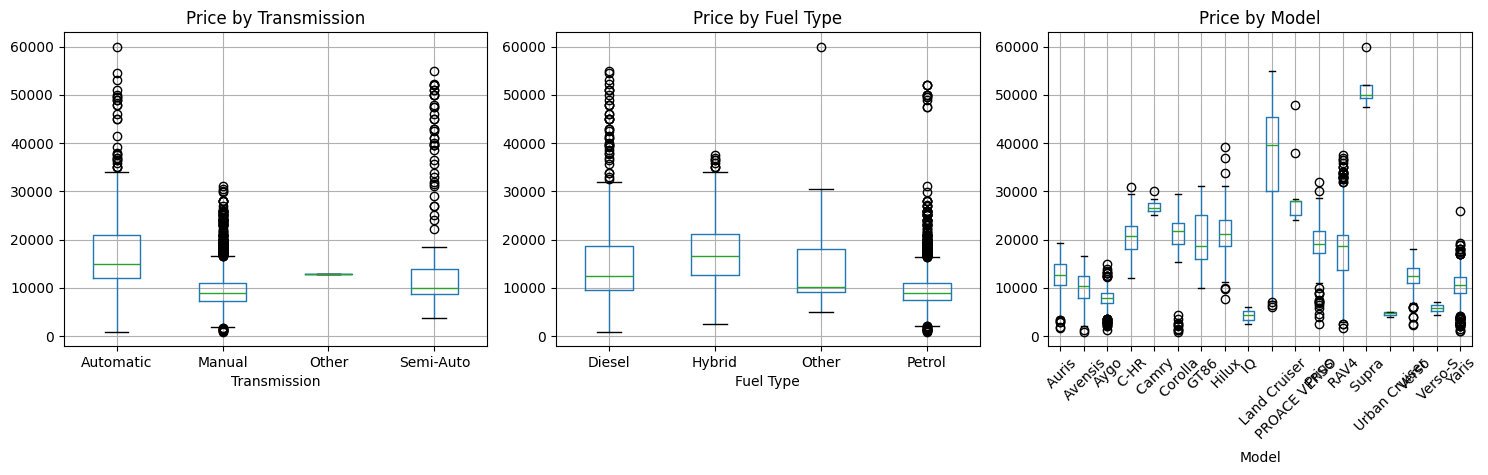

In [26]:
# Boxplot: price vs kategorikal
plt.figure(figsize=(15, 5))

# Price vs transmission
plt.subplot(1, 3, 1)
df.boxplot(column='price', by='transmission', ax=plt.gca())
plt.title('Price by Transmission')
plt.suptitle('')  # Hapus title default
plt.xlabel('Transmission')

# Price vs fuelType
plt.subplot(1, 3, 2)
df.boxplot(column='price', by='fuelType', ax=plt.gca())
plt.title('Price by Fuel Type')
plt.suptitle('')
plt.xlabel('Fuel Type')

# Price vs model
plt.subplot(1, 3, 3)
df.boxplot(column='price', by='model', ax=plt.gca())
plt.title('Price by Model')
plt.suptitle('')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [27]:
# =====================================================
# STEP 1: HAPUS DUPLIKASI
# =====================================================

print("="*60)
print("STEP 1: MENGHAPUS DUPLIKASI")
print("="*60)

# Cek jumlah sebelum
print(f"Data sebelum: {len(df)} baris")
print(f"Duplikasi: {df.duplicated().sum()} baris")

# Hapus duplikasi
df_clean = df.drop_duplicates(keep='first').reset_index(drop=True)

# Cek jumlah setelah
print(f"Data sesudah: {len(df_clean)} baris")
print(f"Data terhapus: {len(df) - len(df_clean)} baris")
print(" Duplikasi berhasil dihapus\n")

STEP 1: MENGHAPUS DUPLIKASI
Data sebelum: 6738 baris
Duplikasi: 39 baris
Data sesudah: 6699 baris
Data terhapus: 39 baris
 Duplikasi berhasil dihapus



In [28]:
print("="*60)
print("STEP 3: IMPUTASI ENGINESIZE = 0")
print("="*60)

# Cek engineSize = 0
zero_engine_count = (df_clean['engineSize'] == 0).sum()
print(f"EngineSize = 0: {zero_engine_count} mobil\n")

if zero_engine_count > 0:
    # Lihat data sebelum imputasi
    print("Data dengan engineSize = 0:")
    print(df_clean[df_clean['engineSize'] == 0][['model', 'year', 'engineSize']])

    # Imputasi dengan median per model
    print("\nMelakukan imputasi dengan median per model...")

    for model in df_clean[df_clean['engineSize'] == 0]['model'].unique():
        # Hitung median engineSize untuk model ini (exclude yang 0)
        median_engine = df_clean[(df_clean['model'] == model) &
                                  (df_clean['engineSize'] > 0)]['engineSize'].median()

        # Isi yang engineSize = 0 dengan median
        df_clean.loc[(df_clean['model'] == model) &
                     (df_clean['engineSize'] == 0), 'engineSize'] = median_engine

        print(f"   {model}: engineSize = 0 diisi dengan {median_engine}")

    # Cek hasil
    print(f"\n Imputasi selesai")
    print(f"EngineSize = 0 tersisa: {(df_clean['engineSize'] == 0).sum()} mobil\n")
else:
    print(" Tidak ada engineSize = 0 - SKIP\n")

STEP 3: IMPUTASI ENGINESIZE = 0
EngineSize = 0: 6 mobil

Data dengan engineSize = 0:
       model  year  engineSize
2522   Yaris  2016         0.0
2532   Yaris  2016         0.0
5096    Aygo  2019         0.0
5201    Aygo  2019         0.0
5225    Aygo  2019         0.0
5923    C-HR  2017         0.0

Melakukan imputasi dengan median per model...
    Yaris: engineSize = 0 diisi dengan 1.5
    Aygo: engineSize = 0 diisi dengan 1.0
    C-HR: engineSize = 0 diisi dengan 1.8

 Imputasi selesai
EngineSize = 0 tersisa: 0 mobil



In [29]:
# =====================================================
# STEP 4: DETEKSI OUTLIERS (IQR METHOD)
# =====================================================

print("="*60)
print("STEP 4: DETEKSI OUTLIERS")
print("="*60)

# Kolom yang akan dicek outliers
outlier_columns = ['price', 'mileage', 'mpg', 'tax']

def detect_outliers_iqr(data, column):
    """Deteksi outliers menggunakan IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers': len(outliers),
        'pct_outliers': len(outliers) / len(data) * 100
    }

# Deteksi outliers
print("\nHasil Deteksi Outliers:\n")
outlier_summary = {}

for col in outlier_columns:
    result = detect_outliers_iqr(df_clean, col)
    outlier_summary[col] = result

    print(f"{col}:")
    print(f"   Q1: {result['Q1']:.2f}")
    print(f"   Q3: {result['Q3']:.2f}")
    print(f"   IQR: {result['IQR']:.2f}")
    print(f"   Lower Bound: {result['lower_bound']:.2f}")
    print(f"   Upper Bound: {result['upper_bound']:.2f}")
    print(f"   Outliers: {result['n_outliers']} ({result['pct_outliers']:.2f}%)\n")

STEP 4: DETEKSI OUTLIERS

Hasil Deteksi Outliers:

price:
   Q1: 8266.50
   Q3: 14995.00
   IQR: 6728.50
   Lower Bound: -1826.25
   Upper Bound: 25087.75
   Outliers: 258 (3.85%)

mileage:
   Q1: 9488.50
   Q3: 31059.50
   IQR: 21571.00
   Lower Bound: -22868.00
   Upper Bound: 63416.00
   Outliers: 270 (4.03%)

mpg:
   Q1: 55.40
   Q3: 70.60
   IQR: 15.20
   Lower Bound: 32.60
   Upper Bound: 93.40
   Outliers: 145 (2.16%)

tax:
   Q1: 0.00
   Q3: 145.00
   IQR: 145.00
   Lower Bound: -217.50
   Upper Bound: 362.50
   Outliers: 3 (0.04%)



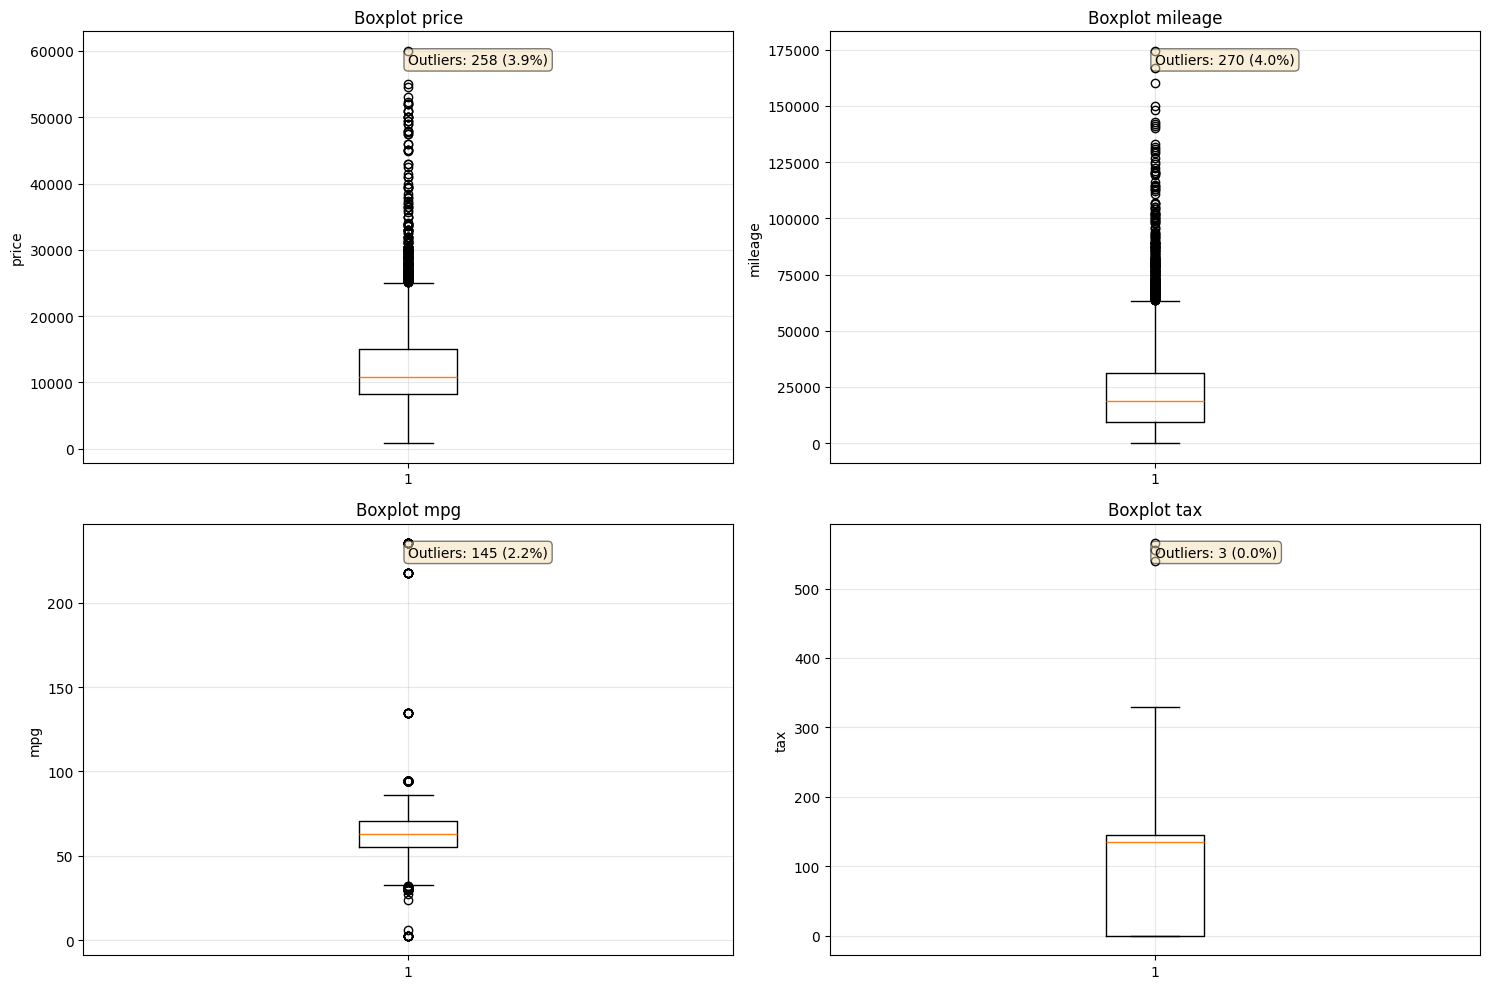

In [30]:
# Visualisasi outliers
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(outlier_columns):
    axes[idx].boxplot(df_clean[col])
    axes[idx].set_title(f'Boxplot {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

    # Tambahkan info outliers
    n_outliers = outlier_summary[col]['n_outliers']
    pct_outliers = outlier_summary[col]['pct_outliers']
    axes[idx].text(0.5, 0.95, f'Outliers: {n_outliers} ({pct_outliers:.1f}%)',
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [31]:
# =====================================================
# STEP 5: HANDLING OUTLIERS
# =====================================================

print("="*60)
print("STEP 5: HANDLING OUTLIERS")
print("="*60)

# PILIHAN METODE:
# Metode 1: Hapus outliers
# Metode 2: Capping (ganti dengan batas atas/bawah)
# Metode 3: Keep (biarkan saja)

# Untuk contoh, kita gunakan METODE 1: Hapus outliers
print("Metode: Hapus outliers dengan IQR\n")

# Simpan jumlah sebelum
before = len(df_clean)

# Hapus outliers untuk setiap kolom
for col in outlier_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) &
                        (df_clean[col] <= upper_bound)]

    print(f" {col}: outliers dihapus")

# Hasil
after = len(df_clean)
removed = before - after

print(f"\nData sebelum: {before} baris")
print(f"Data sesudah: {after} baris")
print(f"Data terhapus: {removed} baris ({removed/before*100:.2f}%)\n")

# Reset index
df_clean = df_clean.reset_index(drop=True)

STEP 5: HANDLING OUTLIERS
Metode: Hapus outliers dengan IQR

 price: outliers dihapus
 mileage: outliers dihapus
 mpg: outliers dihapus
 tax: outliers dihapus

Data sebelum: 6699 baris
Data sesudah: 6059 baris
Data terhapus: 640 baris (9.55%)



In [32]:
# =====================================================
# STEP 6: ENCODING DATA KATEGORIKAL
# =====================================================

print("="*60)
print("STEP 6: ENCODING DATA KATEGORIKAL")
print("="*60)

from sklearn.preprocessing import LabelEncoder

# Kolom kategorikal
categorical_cols = ['model', 'transmission', 'fuelType']

# Simpan mapping untuk dokumentasi
encoding_mapping = {}

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"   Unique values sebelum: {df_clean[col].unique()}")

    # Label Encoding
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])

    # Simpan mapping
    encoding_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    print(f"   Mapping: {encoding_mapping[col]}")
    print(f" {col} berhasil di-encode")

print("\n Semua kolom kategorikal berhasil di-encode\n")

STEP 6: ENCODING DATA KATEGORIKAL

model:
   Unique values sebelum: [' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Camry' ' Verso-S' ' IQ'
 ' Urban Cruiser']
   Mapping: {' Auris': np.int64(0), ' Avensis': np.int64(1), ' Aygo': np.int64(2), ' C-HR': np.int64(3), ' Camry': np.int64(4), ' Corolla': np.int64(5), ' GT86': np.int64(6), ' Hilux': np.int64(7), ' IQ': np.int64(8), ' PROACE VERSO': np.int64(9), ' Prius': np.int64(10), ' RAV4': np.int64(11), ' Urban Cruiser': np.int64(12), ' Verso': np.int64(13), ' Verso-S': np.int64(14), ' Yaris': np.int64(15)}
 model berhasil di-encode

transmission:
   Unique values sebelum: ['Manual' 'Semi-Auto' 'Automatic' 'Other']
   Mapping: {'Automatic': np.int64(0), 'Manual': np.int64(1), 'Other': np.int64(2), 'Semi-Auto': np.int64(3)}
 transmission berhasil di-encode

fuelType:
   Unique values sebelum: ['Petrol' 'Other' 'Hybrid' 'Diesel']
   Mapping: {'Diesel': np.int64(0), 'Hybri

In [33]:
# Lihat hasil encoding
print("Hasil Encoding:")
print(df_clean[['model', 'model_encoded',
                'transmission', 'transmission_encoded',
                'fuelType', 'fuelType_encoded']].head(10))

Hasil Encoding:
   model  model_encoded transmission  transmission_encoded fuelType  \
0   GT86              6       Manual                     1   Petrol   
1   GT86              6       Manual                     1   Petrol   
2   GT86              6       Manual                     1   Petrol   
3   GT86              6       Manual                     1   Petrol   
4   GT86              6       Manual                     1   Petrol   
5   GT86              6       Manual                     1   Petrol   
6   GT86              6       Manual                     1   Petrol   
7   GT86              6       Manual                     1   Petrol   
8   GT86              6       Manual                     1   Petrol   
9   GT86              6       Manual                     1   Petrol   

   fuelType_encoded  
0                 3  
1                 3  
2                 3  
3                 3  
4                 3  
5                 3  
6                 3  
7                 3  
8   

In [34]:
# =====================================================
# STEP 7: FEATURE SCALING
# =====================================================

print("="*60)
print("STEP 7: FEATURE SCALING (STANDARDIZATION)")
print("="*60)

from sklearn.preprocessing import StandardScaler

# Kolom numerik yang akan di-scale (exclude yang sudah encoded)
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Buat scaler
scaler = StandardScaler()

# Scale features
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

print(" Feature scaling selesai\n")

# Lihat hasil
print("Statistik setelah scaling:")
print(df_clean[numerical_features].describe())

STEP 7: FEATURE SCALING (STANDARDIZATION)
 Feature scaling selesai

Statistik setelah scaling:
               year       mileage           tax           mpg    engineSize
count  6.059000e+03  6.059000e+03  6.059000e+03  6.059000e+03  6.059000e+03
mean   4.563704e-14 -2.345413e-17 -6.098073e-17  4.221743e-16  4.878458e-16
std    1.000083e+00  1.000083e+00  1.000083e+00  1.000083e+00  1.000083e+00
min   -9.658074e+00 -1.477002e+00 -1.290615e+00 -2.371657e+00 -1.081043e+00
25%   -5.031506e-01 -7.827960e-01 -1.290615e+00 -5.824371e-01 -1.081043e+00
50%    6.903211e-02 -1.867970e-01  6.144594e-01  2.196273e-01  2.053974e-01
75%    6.412148e-01  6.280882e-01  7.555760e-01  5.192997e-01  9.772619e-01
max    1.785580e+00  3.036761e+00  2.942884e+00  2.017662e+00  4.064720e+00


In [35]:
# =====================================================
# STEP 8: SIMPAN DATA BERSIH
# =====================================================

print("\n" + "="*60)
print("STEP 8: SIMPAN DATA HASIL PREPROCESSING")
print("="*60)

# Buat folder jika belum ada
import os
os.makedirs('preprocessing/toyota_clean', exist_ok=True)

# Simpan data
output_path = 'preprocessing/toyota_clean/toyota_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f" Data berhasil disimpan ke: {output_path}")
print(f"   Total data: {len(df_clean)} baris")
print(f"   Total kolom: {df_clean.shape[1]} kolom\n")

print("="*60)
print(" PREPROCESSING SELESAI!")
print("="*60)


STEP 8: SIMPAN DATA HASIL PREPROCESSING
 Data berhasil disimpan ke: preprocessing/toyota_clean/toyota_clean.csv
   Total data: 6059 baris
   Total kolom: 12 kolom

 PREPROCESSING SELESAI!
